### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *
import os
import sqlite3

 ### 2 Reading Data

In [3]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('Data/cleaned_data.csv')

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 21.9 µs


In [4]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [6]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location

# Constants
DB_PATH = "/home/Assignment/01_data_pipeline/scripts/"
DB_FILE = "lead_scoring_data_cleaning.db"
TABLE_NAME = "cleaned_leads"
MLFLOW_TRACKING_URI = "http://localhost:5000"
MODEL_NAME = "lead_scoring_model"

# Connect to Database
db_full_path = os.path.join(DB_PATH, DB_FILE)
conn = sqlite3.connect(db_full_path)


In [7]:
# Load Data
df = pd.read_sql(f"SELECT * FROM {TABLE_NAME}", conn)
conn.close()
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [10]:

df = pd.read_csv("/home/Assignment/02_training_pipeline/notebooks/Data/cleaned_data.csv")
print(df.columns)


Index(['created_date', 'city_tier', 'first_platform_c', 'first_utm_medium_c',
       'first_utm_source_c', 'total_leads_droppped', 'referred_lead',
       'app_complete_flag', 'assistance_interaction', 'career_interaction',
       'payment_interaction', 'social_interaction', 'syllabus_interaction'],
      dtype='object')


In [8]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

'\nNow you need to start the MLflow server in a new terminal. \nNote: Before you start the MLflow server, create a folder named mlruns in the assignment directory.\nNow you need to run the command to start MLflow server such that:\n1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.\n2. mlruns folder is used as an artifact directory. \n3. The server runs on the port 6006.\n\nThe steps to do so are as follows:\nOpen a new terminal.\nThen go to the Assignment directory using the cd command. Type the command: cd Assignment/\nCreate a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns\nThen, type the following command to start the MLflow server: \nmlflow server --backend-store-uri=\'sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db\' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0\n'

In [ ]:
# Once, your server is successfully running, create a mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri("http://0.0.0.0:6006")

### 4 : Model Experimentation with pycaret

In [11]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
exp1 = setup(data=df, target='app_complete_flag', normalize=True, transformation=True, silent=True, 
             remove_perfect_collinearity=True,experiment_name='Lead_Scoring_Model_Experimentation', session_id=42)

# Manually specify the models we want to use (excluding the unwanted ones)
best_model = compare_models(include=['rf', 'lightgbm', 'dt', 'xgboost'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7473,0.8294,0.8306,0.7137,0.7677,0.4941,0.5009,13.0180
lightgbm,Light Gradient Boosting Machine,0.7469,0.8283,0.8345,0.7118,0.7683,0.4932,0.5009,0.4480
rf,Random Forest Classifier,0.7156,0.7890,0.7574,0.7011,0.7281,0.4310,0.4324,5.4760
dt,Decision Tree Classifier,0.6830,0.7044,0.6532,0.6972,0.6745,0.3662,0.3669,0.4350


In [13]:
# create a model which gives the highest accuracy
best_model = compare_models()
print("Best Model:", best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7473,0.8294,0.8306,0.7137,0.7677,0.4941,0.5009,13.2030
lightgbm,Light Gradient Boosting Machine,0.7469,0.8283,0.8345,0.7118,0.7683,0.4932,0.5009,1.1260
gbc,Gradient Boosting Classifier,0.7351,0.8154,0.8323,0.6986,0.7596,0.4697,0.4787,5.7360
lr,Logistic Regression,0.7188,0.7930,0.7945,0.6920,0.7397,0.4371,0.4421,1.1070
svm,SVM - Linear Kernel,0.7172,0.0000,0.7257,0.7158,0.7206,0.4342,0.4344,0.6180
ridge,Ridge Classifier,0.7165,0.0000,0.8100,0.6842,0.7418,0.4324,0.4400,0.1220
lda,Linear Discriminant Analysis,0.7165,0.7917,0.8101,0.6842,0.7418,0.4324,0.4400,1.2550
ada,Ada Boost Classifier,0.7161,0.7943,0.7550,0.7026,0.7278,0.4319,0.4332,1.4150
rf,Random Forest Classifier,0.7157,0.7890,0.7573,0.7011,0.7281,0.4310,0.4324,5.5150
knn,K Neighbors Classifier,0.7080,0.7749,0.7445,0.6959,0.7194,0.4157,0.4167,113.4150


Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


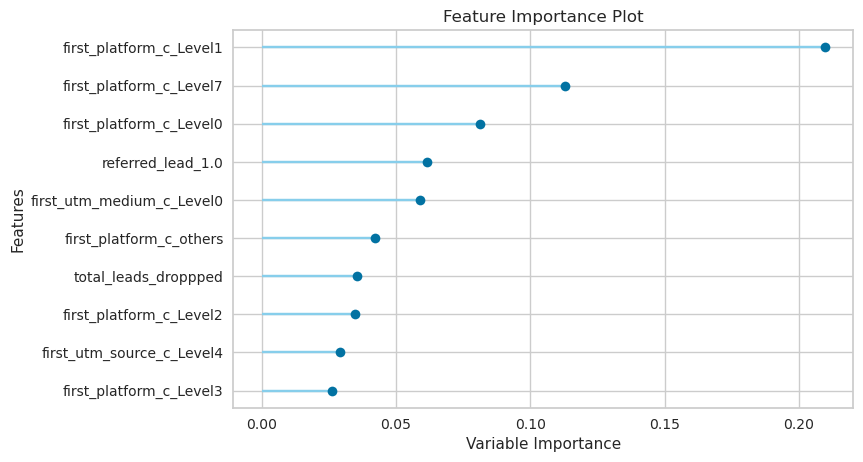

In [ ]:
# create feature importance plot
plot_model(best_model, plot='feature')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [15]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

significant_features = ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
dataset_new = dataset[cols]

NameError: name 'cols' is not defined

In [13]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 

exp2 = setup(data=df, target='app_complete_flag', normalize=False, transformation=False, silent=True, 
             remove_perfect_collinearity=True, session_id=42, 
             ignore_models=['gbc', 'knn', 'qda', 'dummy', 'svm', 'ada'])


# Compare and Select the Best Model
best_tree_model = compare_models()
print("Best Tree-Based Model:", best_tree_model)
plot_model(best_tree_model, plot='feature')

# Tune LightGBM Model using Optuna
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 300, step=20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
    }
    tuned_model = create_model('lightgbm', fold=10, optimize='AUC', **params)
    return tuned_model

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

In [ ]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret

final_model = create_model('lightgbm', fold=10, optimize='AUC', **study.best_params)
print("Final Model Configuration:", final_model.get_params())

In [ ]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Lead_Scoring_Experiment")

with mlflow.start_run():
    mlflow.log_params(study.best_params)
    mlflow.pycaret.log_model(final_model, MODEL_NAME)

In [ ]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
print("Training Completed and Model Logged in MLflow!")